In [6]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [7]:
df = pd.read_csv('diabetes.csv') 

In [8]:
task_data = df.head(520)

In [9]:
len(task_data[task_data['Outcome'] == 0])

333

In [10]:
train = task_data.head(int(len(task_data)*0.8))
test = task_data.tail(int(len(task_data)*0.2))

In [11]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
features = list(train.columns[:8])

In [13]:
print(features)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [14]:
x = train[features]
y = train['Outcome']

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
tree = DecisionTreeClassifier(criterion='entropy', #критерий разделения
                              min_samples_leaf=15, #минимальное число объектов в листе
                              max_leaf_nodes=25, #максимальное число листьев
                              random_state=2020)
clf=tree.fit(x, y)

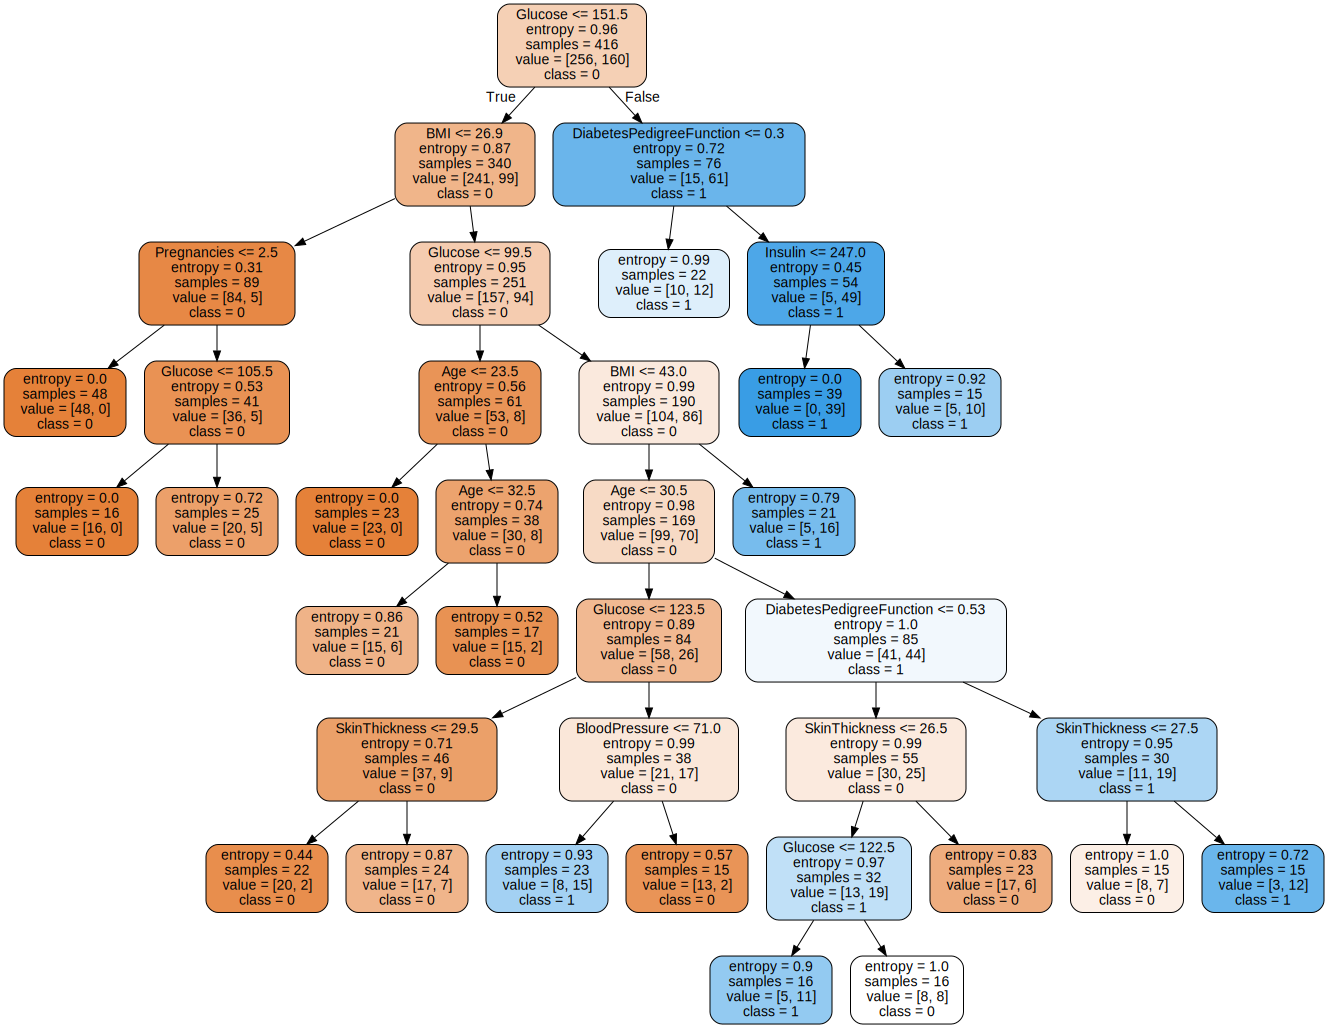

In [20]:
from sklearn.tree import export_graphviz
import graphviz
columns = list(x.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [22]:
clf.tree_.max_depth

8

In [23]:
x_test = test[features]
y_test_true = test['Outcome']
y_test_pred = clf.predict(x_test)

In [24]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
416,1,97,68,21,0,27.2,1.095,22
417,4,144,82,32,0,38.5,0.554,37
418,1,83,68,0,0,18.2,0.624,27
419,3,129,64,29,115,26.4,0.219,28
420,1,119,88,41,170,45.3,0.507,26
...,...,...,...,...,...,...,...,...
515,3,163,70,18,105,31.6,0.268,28
516,9,145,88,34,165,30.3,0.771,53
517,7,125,86,0,0,37.6,0.304,51
518,13,76,60,0,0,32.8,0.180,41


In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_true, y_test_pred)

0.8173076923076923

In [26]:
from sklearn.metrics import f1_score
f1_score(y_test_true, y_test_pred, average='macro')

0.759464394400487

In [27]:
df.loc[739, features]

Pregnancies                  5.000
Glucose                     97.000
BloodPressure               76.000
SkinThickness               27.000
Insulin                      0.000
BMI                         35.600
DiabetesPedigreeFunction     0.378
Age                         52.000
Name: 719, dtype: float64

In [32]:
clf.predict([df.loc[734, features]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0